In [1]:
import os 
import numpy as pd 
import holidays_co
import pandas as pd 
pd.options.mode.chained_assignment = None

os.chdir('../')
from data import *

In [2]:
settings = read_settings()
train, test = train_test_data(settings)

observations = []
for agg in ['day','hour','15-mins']:
    # df = read_data(settings)
    # df = temporal_variables(df, aggregation = agg)
    # df = aggreagtion_func(df, aggregation = agg)
    settings['aggregation'] = agg
    train, test = train_test_data(settings)
    total_obs = len(train) + len(test)
    print ('{} Train shape: {} \n Test Shape: {} \n Total Observations: {}'.format(agg, train.shape, test.shape, total_obs))
    print("")
#     observations.append(df.shape)

# observations

day Train shape: (1096, 157) 
 Test Shape: (1004, 157) 
 Total Observations: 2100

hour Train shape: (20824, 159) 
 Test Shape: (19076, 159) 
 Total Observations: 39900

15-mins Train shape: (83296, 159) 
 Test Shape: (76304, 159) 
 Total Observations: 159600



## Fast Fourier Transformations

In [3]:
import tensorflow as tf 
import matplotlib.pyplot as plt

In [4]:
# Day data
settings['aggregation'] = 'hour'
train_day, test_day = train_test_data(settings)

#Station names 
stations = df.columns.str.contains("\(")
stations = df.columns[stations]


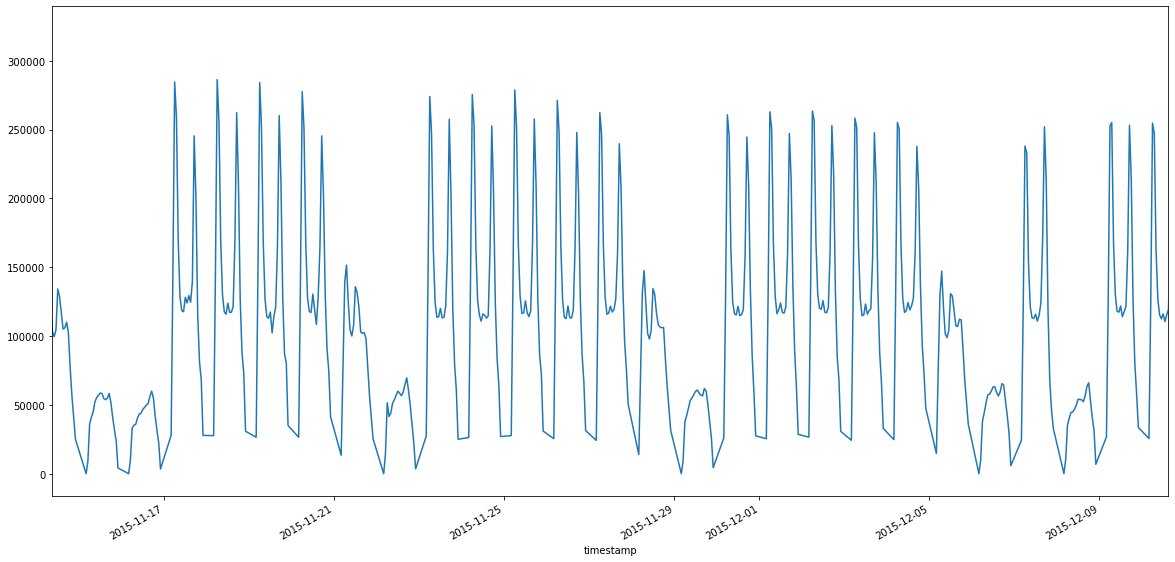

In [5]:
#Total Demand 
total_demand = train_day[stations].sum(axis = 1)
total_demand.plot(figsize = (20,10))
plt.xlim([total_demand.index[2000], total_demand.index[2500]]);

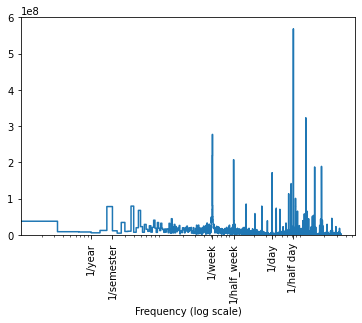

In [6]:
td = total_demand.reset_index(drop = True)

fft = tf.signal.rfft(td)
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(td)
hours_per_year = 19 * 365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 600000000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 2, 52, 104, 365.2524, 365.2524*2], 
            labels=['1/year', '1/semester','1/week','1/half_week','1/day','1/half day'], rotation = 90)

# plt.xticks([1, 2, 12, 52,104], 
#             labels=['1/year','1/Semester', '1/month','1/week','1/half_week','1/day', '1/half day'], rotation = 90)            
_ = plt.xlabel('Frequency (log scale)')

## Adding Temporal Variables to DF 

In [7]:
# Year, weekely and daily cycles
timestamp_s = df.timestamp.map(pd.Timestamp.timestamp)
day = 24 * 60 * 60
week = day * 7
year = day * 365.2524

df['day_sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['day_cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['week_sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['week_cos'] = np.cos(timestamp_s * (2 * np.pi / year))
df['year_sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['year_cos'] = np.cos(timestamp_s * (2 * np.pi / year))

AttributeError: 'DataFrame' object has no attribute 'timestamp'

Text(0.5, 1.0, 'Time of day signal')

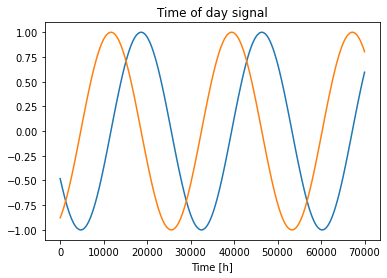

In [ ]:
plt.plot(np.array(df['week_sin'])[:70000])
plt.plot(np.array(df['week_cos'])[:70000])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

In [ ]:
# Holidays (Sundays and National Holidays)

## Holidays DataFrame
#Get API with holidays from 2015 to 2021
years = range(2015,2022)

holidays = []
for year in years: 
    year_holidays = holidays_co.get_colombia_holidays_by_year(year)
    for day in year_holidays:
        holidays.append(day.date)

holidays = pd.Series(pd.to_datetime(holidays))

In [ ]:
## Holidays DataFrame

#Get API with holidays from 2015 to 2021
years = range(2015,2022)

holidays = []
for year in years: 
    year_holidays = holidays_co.get_colombia_holidays_by_year(year)
    for day in year_holidays:
        holidays.append(day.date)

holidays = pd.Series(pd.to_datetime(holidays))

# Holidays
df['datetime'] = pd.to_datetime(df.timestamp).dt.normalize()
df['sunday'] = (df.timestamp.dt.weekday == 6).astype(int)
df['holiday'] = df['datetime'].isin(holidays)
df['holiday'] = df.sundays.mask(df.holiday, 1)

In [ ]:
# Saturdays 
df['saturday'] = (df.timestamp.dt.weekday == 5).astype(int)

,timestamp,(02000) cabecera autopista norte,(02001) centro comercial santa fe,(02101) toberin,(02102) calle 161,(02103) mazuren,(02104) calle 146,(02105) calle 142,(02200) alcala,(02201) prado,...,day_sin,day_cos,week_sin,week_cos,year_sin,year_cos,sundays,datetime,sunday,holiday
0,2015-08-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.866025,0.500000,-0.481185,-0.876619,-0.481185,-0.876619,0,2015-08-01,0,0
1,2015-08-01 04:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.896873,0.442289,-0.481342,-0.876533,-0.481342,-0.876533,0,2015-08-01,0,0
2,2015-08-01 04:30:00,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.923880,0.382683,-0.481499,-0.876447,-0.481499,-0.876447,0,2015-08-01,0,0
3,2015-08-01 04:45:00,52.0,0.0,0.0,0.0,3.0,3.0,0.0,28.0,0.0,...,0.946930,0.321439,-0.481656,-0.876360,-0.481656,-0.876360,0,2015-08-01,0,0
4,2015-08-01 05:00:00,78.0,0.0,0.0,0.0,5.0,14.0,42.0,44.0,0.0,...,0.965926,0.258819,-0.481813,-0.876274,-0.481813,-0.876274,0,2015-08-01,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159671,2021-05-01 21:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.555570,0.831470,0.872126,-0.489281,0.872126,-0.489281,0,2021-05-01,0,1
159672,2021-05-01 22:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.500000,0.866025,0.872038,-0.489438,0.872038,-0.489438,0,2021-05-01,0,1
159673,2021-05-01 22:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.442289,0.896873,0.871951,-0.489594,0.871951,-0.489594,0,2021-05-01,0,1
159674,2021-05-01 22:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.382683,0.923880,0.871863,-0.489750,0.871863,-0.489750,0,2021-05-01,0,1


## Checking files shapes for models 

In [2]:
os.getcwd()
from models.arima import arimaClass
from models.sarima import sarimaClass
from models.cnn import cnnClass
from models.lstm import lstmClass
from models.dense import denseClass

In [6]:
settings = read_settings()

## Arima and Sarima Models
obs = 100
train_break = 50
df = pd.DataFrame({'series':np.random.randint(0,10,obs),
 'exogenous':np.random.randint(0,100,obs)})

# 100 days 
df.set_index(pd.date_range(start='1/1/2018', end='04/10/2018'), inplace = True)


# 500 Days 
# df.set_index(pd.date_range(start='1/1/2018', end='5/15/2019'), inplace = True)

In [7]:
#Train test division
df_train = df[:train_break]
df_test = df[train_break:]

In [8]:
model = arimaClass(settings,'series')
model.forecast_window = 2
model.fit(df_train)
result = model.predict(df_test, 0, 1)
output = result.shape
print ('Observations: {}, Train Output: {}.'.format(obs, train_break))
print ('Expected Output Shape [Observation - Train Output]: ({},{})'.format(obs -train_break, model.forecast_window))
print ('Actual Output Shape [Observation - Train Output]: {}'.format(output))

INFO:root:Model for station series compleated. Time 0.01 minutes
INFO:root:Prediction for station series compleated. Time 0.02 minutes


Observations: 100, Train Output: 50.
Expected Output Shape [Observation - Train Output]: (50,2)
Actual Output Shape [Observation - Train Output]: (50, 2)


In [11]:
model.time

0.01535123586654663

In [12]:
model = sarimaClass(settings,'series')
model.forecast_window = 2
model.fit(df_train)
result = model.predict(df_test, 0, 1)
output = np.array(result['prediction']).shape

print ('Observations: {}, Train Output: {}.'.format(obs, train_break))
print ('Expected Output Shape [Observation - Train Output]: ({},{})'.format(obs -train_break, model.forecast_window))
print ('Actual Output Shape [Observation - Train Output]: {}'.format(output))

INFO:root:Model for station series compleated. Time 0.02 minutes
INFO:root:Prediction for station series compleated. Time 0.01 minutes


Observations: 100, Train Output: 50.
Expected Output Shape [Observation - Train Output]: (50,2)
Actual Output Shape [Observation - Train Output]: (50, 2)


In [21]:
w = WindowGenerator(input_width =3 , label_width =2, shift=2, data = df, 
                    label_columns=['series'], train_date='2018-02-19', 
                    val_date=None, batch_size=100)

# Train shape 
print ('Expected Train shape: {}'.format(50 - w.input_width - w.label_width + 1))
for x, y in w.train.take(1):
    print ('Actual size:{}'.format(x.shape[0]))

# Test shape 
print()
print ('Expected Test shape: {}'.format(obs - 50))
for x, y in w.test.take(1):
    print ('Actual size:{}'.format(x.shape[0]))
w.test

Expected Train shape: 46
Actual size:46

Expected Test shape: 50
Actual size:50


<MapDataset shapes: ((None, 3, 2), (None, 2, 1)), types: (tf.float32, tf.float32)>

In [125]:
window= WindowGenerator(input_width =3 , label_width =2, shift=2, data = df, 
                    label_columns=['series'], train_date='2018-10-19', 
                    val_date=None, batch_size=32)

In [33]:
model = cnnClass(settings,'series')
model.forecast_window = 2
model.conv_widht = 3
model.fit(w)
result = model.predict(w, 0, 1).reshape((50,2))
output = result.shape

print ('Observations: {}, Train Output: {}.'.format(obs, train_break))
print ('Expected Output Shape [Observation - Train Output]: ({},{})'.format(obs -train_break, model.forecast_window))
print ('Actual Output Shape [Observation - Train Output]: {}'.format(output))



Observations: 100, Train Output: 50.
Expected Output Shape [Observation - Train Output]: (50,2)
Actual Output Shape [Observation - Train Output]: (50, 2)


In [34]:
model = lstmClass(settings,'series')
model.forecast_window = 2
model.conv_widht = 3
model.fit(w)
result = model.predict(w, 0, 1).reshape((50,2))
output = result.shape

print ('Observations: {}, Train Output: {}.'.format(obs, train_break))
print ('Expected Output Shape [Observation - Train Output]: ({},{})'.format(obs -train_break, model.forecast_window))
print ('Actual Output Shape [Observation - Train Output]: {}'.format(output))


Observations: 100, Train Output: 50.
Expected Output Shape [Observation - Train Output]: (50,2)
Actual Output Shape [Observation - Train Output]: (50, 2)


In [35]:
model = denseClass(settings,'series')
model.forecast_window = 2
model.conv_widht = 3
model.fit(w)
result = model.predict(w, 0, 1).reshape((50,2))
output = result.shape

print ('Observations: {}, Train Output: {}.'.format(obs, train_break))
print ('Expected Output Shape [Observation - Train Output]: ({},{})'.format(obs -train_break, model.forecast_window))
print ('Actual Output Shape [Observation - Train Output]: {}'.format(output))

Observations: 100, Train Output: 50.
Expected Output Shape [Observation - Train Output]: (50,2)
Actual Output Shape [Observation - Train Output]: (50, 2)
